In [69]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [70]:
data = pd.read_csv('datasets/CC GENERAL.csv')

In [71]:
data.describe()
data.info()
data.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8946,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
8947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8948,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [72]:
data.columns[data.isnull().any()]

Index(['CREDIT_LIMIT', 'MINIMUM_PAYMENTS'], dtype='object')

In [73]:
data.drop(columns=['CUST_ID'], inplace =True)

In [74]:
data['CREDIT_LIMIT'].fillna(data.CREDIT_LIMIT.mean(),inplace=True)

In [75]:
data['MINIMUM_PAYMENTS'].fillna(data.MINIMUM_PAYMENTS.mean(),inplace=True)

In [76]:
data.columns[data.isnull().any()]
print(data.columns)
print(data.describe())

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max   

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PAYMENTS']] = scaler.fit_transform(data[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PAYMENTS']])

In [78]:
x = data.iloc[:,:].values
print(x[0])

[-7.31989366e-01  8.18182000e-01 -4.24899735e-01 -3.56934022e-01
 -3.49078819e-01 -4.66785554e-01  1.66667000e-01  0.00000000e+00
  8.33330000e-02  0.00000000e+00  0.00000000e+00  2.00000000e+00
  1.00000000e+03 -5.28978791e-01  1.39509787e+02  0.00000000e+00
  1.20000000e+01]


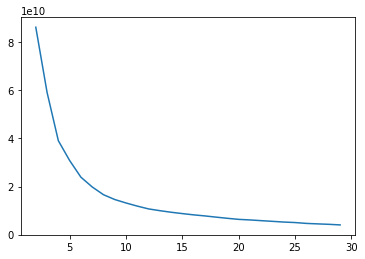

In [81]:
from sklearn.cluster import KMeans

inertia = []
ax = []
for i in range(2,30):
    ax.append(i)
    kmeans= KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)
plt.plot(ax,inertia)

In [82]:
kmeans = KMeans(n_clusters=2, init = 'k-means++', random_state=0)
kmeans.fit(x)
y_pred = kmeans.predict(x)
print(y_pred)

[1 0 0 ... 1 1 1]


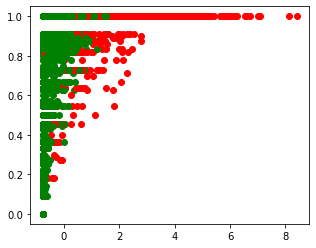

In [83]:
plt.figure(figsize=(5,4))
colors = ['red','green','blue','cyan']
for a,b in zip(x,y_pred):
    plt.scatter(a[0],a[1], color=colors[b])